# Required Libraries

In [115]:
# install.packages("viridis")

In [116]:
library("readxl")
options(warn = 0)

# libraries
library(dplyr)
library(ggplot2)
library(caTools)
library(caret)
library(GGally)
library(janitor)
library(corrplot)
library(tidyverse)
library(hrbrthemes)
library(viridis)

# Loading Dataset 

In [117]:
df <- read_excel("data/Whitewine_v2.xlsx")
head(df)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.1,0.27,0.41,1.45,0.033,11,63,0.9908,2.99,0.56,12.0,5
8.6,0.23,0.40,4.20,0.035,17,109,0.9947,3.14,0.53,9.7,5
7.9,0.18,0.37,1.20,0.040,16,75,0.9920,3.18,0.63,10.8,5
8.3,0.42,0.62,19.25,0.040,41,172,1.0002,2.98,0.67,9.7,5
6.5,0.31,0.14,7.50,0.044,34,133,0.9955,3.22,0.50,9.5,5
7.6,0.67,0.14,1.50,0.074,25,168,0.9937,3.05,0.51,9.3,5


In [118]:
# format columns
df <- janitor::clean_names(df)

# EDA 

Getting some idea about the dataset

In [119]:
summary(df)

 fixed_acidity    volatile_acidity  citric_acid     residual_sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.700  
 Median : 6.800   Median :0.2600   Median :0.3200   Median : 5.300  
 Mean   : 6.842   Mean   :0.2744   Mean   :0.3352   Mean   : 6.455  
 3rd Qu.: 7.300   3rd Qu.:0.3200   3rd Qu.:0.3900   3rd Qu.:10.000  
 Max.   :14.200   Max.   :0.9650   Max.   :1.6600   Max.   :65.800  
   chlorides       free_sulfur_dioxide total_sulfur_dioxide    density      
 Min.   :0.00900   Min.   :  2.00      Min.   :  9.0        Min.   :0.9871  
 1st Qu.:0.03600   1st Qu.: 24.00      1st Qu.:109.0        1st Qu.:0.9917  
 Median :0.04300   Median : 34.00      Median :134.0        Median :0.9937  
 Mean   :0.04561   Mean   : 35.65      Mean   :138.7        Mean   :0.9940  
 3rd Qu.:0.05000   3rd Qu.: 46.00      3rd Qu.:167.0        3rd Qu.:0.9961  
 Max.   :0.34600   Max.   :131.00      Max.   :344.0   

with the minimum and maximum value of the each column I was able to get an idea about which column may be have some outliars, 

residual sugar column's minimum is 0.600 and maximum is 65.800, as the givan description about features there are some rare wine categories in this dataframe.

PH scale also should be 3<PH<4 and there may be outliares in PH column.

we have to deal with outliares in next steps

In [120]:
#check null values
sum(is.na(df))

[1] 0

there are no null values in this dataset

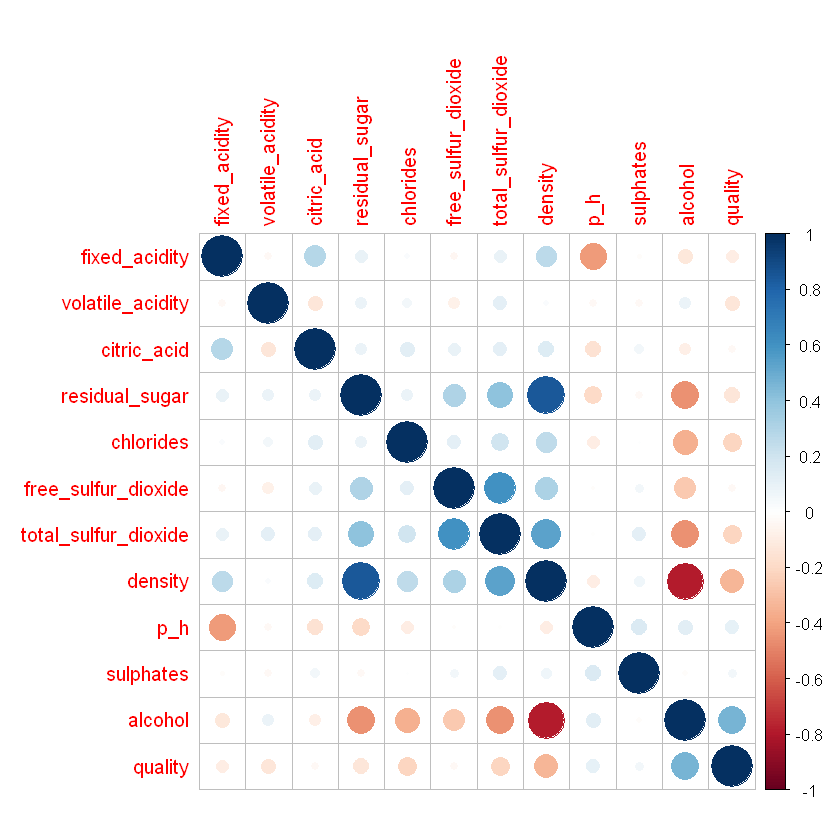

In [121]:
#Correlation Heatmap of Variables
corrplot(cor(df))

as heatmap suggestions alcohol jas strongest correlation with the wine quality

# Outlier Remove

using data vizializations to detect outliaers

In [122]:
# create a dataset
data <- data.frame(
  name=c( rep("A",500), rep("B",500), rep("B",500), rep("C",20), rep('D', 100)  ),
  value=c( rnorm(500, 10, 5), rnorm(500, 13, 1), rnorm(500, 18, 1), rnorm(20, 25, 4), rnorm(100, 12, 1) )
)

In [124]:
head(data)

,name,value
,<chr>,<dbl>
1,A,21.662296
2,A,13.339080
3,A,7.089739
4,A,12.641280
5,A,7.869955
6,A,3.486977
